# **Predictive Analysis**

>***UC-Irvine Online Shoppers Purchasing Intention Dataset***

#Importing libraries and dataset

**Importing required libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import copy

from sklearn.utils import indexable, check_random_state, shuffle
from pandas.core.frame import DataFrame
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from xgboost import XGBClassifier, plot_tree
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import plot_confusion_matrix


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Reading the dataset to Pandas dataframe**

In [2]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv"
df_original = pd.read_csv (url)

**Making a copy to keep the original if needed.**

In [3]:
df_c=df_original.copy()

# Preprocessing the dataset

**Numerical data Normalization**

In [4]:
#defining the preprocessor 
Normalizer=Normalizer()

#creating a list of numerical features 
numeric_features = ["Administrative", "Administrative_Duration", 
                    "Informational", "Informational_Duration", "ProductRelated",
                     "ProductRelated_Duration", "BounceRates", 
                    "ExitRates", "PageValues", "SpecialDay"]


In [5]:
#normalizing the numerical features 
df_c[numeric_features]=Normalizer.fit_transform(df_c[numeric_features])

**Transforming the categorical features to integers**

In [6]:
#creating a list of categorical features

categorical_features = ["Month", "OperatingSystems", "Browser","Region", "TrafficType", "VisitorType", "Weekend", "Revenue"]

#defining LabelEncoder object
label = preprocessing.LabelEncoder()

#using a for loop to transform all categorical features 
for col in categorical_features:
  df_c[col]=label.fit_transform(df_c[col])

**Let's take a look at the transformed dataset before we proceed**

In [7]:
df_c

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.000000,0.000000,0.0,0.0,0.962250,0.000000,0.192450,0.192450,0.000000,0.0,2,0,0,0,0,2,0,0
1,0.000000,0.000000,0.0,0.0,0.031235,0.999511,0.000000,0.001562,0.000000,0.0,2,1,1,0,1,2,0,0
2,0.000000,0.000000,0.0,0.0,0.962250,0.000000,0.192450,0.192450,0.000000,0.0,2,3,0,8,2,2,0,0
3,0.000000,0.000000,0.0,0.0,0.599404,0.799206,0.014985,0.041958,0.000000,0.0,2,2,1,1,3,2,0,0
4,0.000000,0.000000,0.0,0.0,0.015934,0.999873,0.000032,0.000080,0.000000,0.0,2,2,2,0,3,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,0.001676,0.080983,0.0,0.0,0.029601,0.996251,0.000004,0.000016,0.006837,0.0,1,3,5,0,0,2,1,0
12326,0.000000,0.000000,0.0,0.0,0.010735,0.999942,0.000000,0.000046,0.000000,0.0,7,2,1,0,7,2,1,0
12327,0.000000,0.000000,0.0,0.0,0.032547,0.999470,0.000452,0.000470,0.000000,0.0,7,2,1,0,12,2,1,0
12328,0.011287,0.211640,0.0,0.0,0.042328,0.976365,0.000000,0.000059,0.000000,0.0,7,1,1,2,10,2,0,0


**Let's also recheck the datatypes after transformation**

In [8]:
df_c.dtypes

Administrative             float64
Administrative_Duration    float64
Informational              float64
Informational_Duration     float64
ProductRelated             float64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                        int64
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                  int64
Weekend                      int64
Revenue                      int64
dtype: object

**Plotting the probability distribution (Q-Q) for all features to detect outliers**

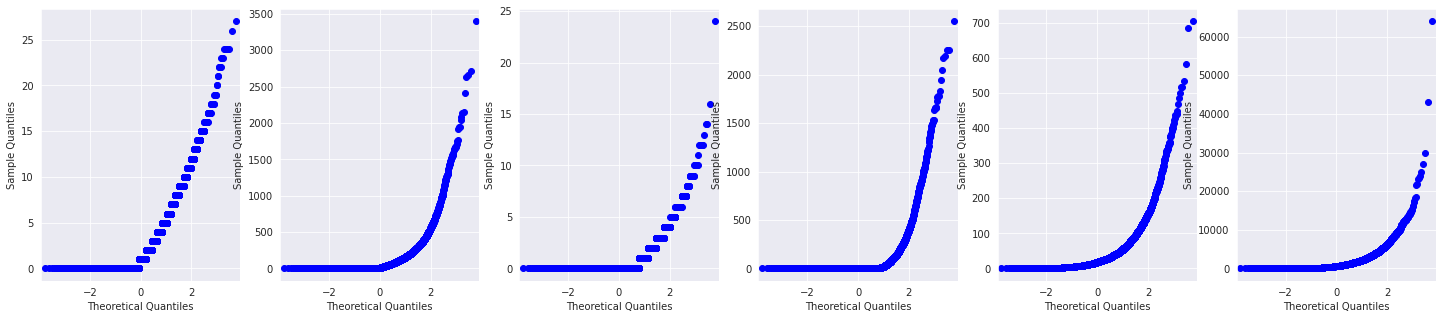

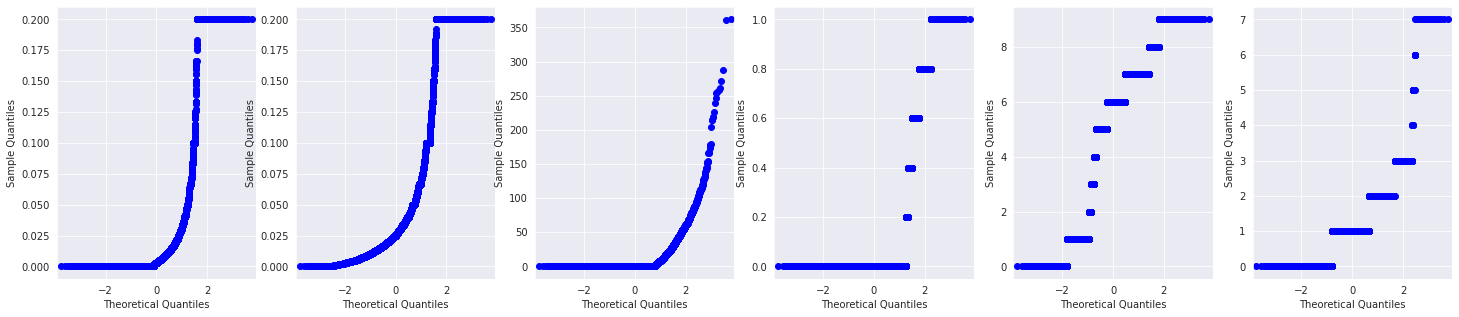

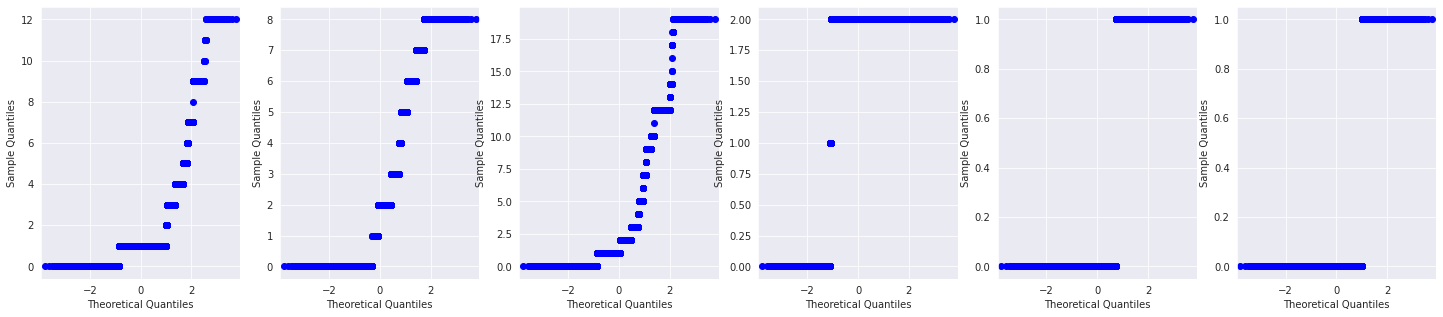

In [9]:
sns.set_style('darkgrid')

fig, ax = plt.subplots(1, 6, figsize=(25, 5))
sm.ProbPlot(df_original["Administrative"]).qqplot(  ax=ax[0])
sm.ProbPlot(df_original["Administrative_Duration"]).qqplot( ax=ax[1])
sm.ProbPlot(df_original["Informational"]).qqplot( ax=ax[2]);
sm.ProbPlot(df_original["Informational_Duration"]).qqplot( ax=ax[3]);
sm.ProbPlot(df_original["ProductRelated"]).qqplot( ax=ax[4]);
sm.ProbPlot(df_original["ProductRelated_Duration"]).qqplot( ax=ax[5]);

fig, ax = plt.subplots(1, 6, figsize=(25, 5))
sm.ProbPlot(df_original["BounceRates"]).qqplot(  ax=ax[0])
sm.ProbPlot(df_original["ExitRates"]).qqplot( ax=ax[1])
sm.ProbPlot(df_original["PageValues"]).qqplot( ax=ax[2]);
sm.ProbPlot(df_original["SpecialDay"]).qqplot( ax=ax[3]);
sm.ProbPlot(df_c["Month"]).qqplot( ax=ax[4]);
sm.ProbPlot(df_c["OperatingSystems"]).qqplot( ax=ax[5]);


fig, ax = plt.subplots(1, 6, figsize=(25, 5))
sm.ProbPlot(df_c["Browser"]).qqplot(  ax=ax[0])
sm.ProbPlot(df_c["Region"]).qqplot( ax=ax[1])
sm.ProbPlot(df_c["TrafficType"]).qqplot( ax=ax[2]);
sm.ProbPlot(df_c["VisitorType"]).qqplot( ax=ax[3]);
sm.ProbPlot(df_c["Weekend"]).qqplot( ax=ax[4]);
sm.ProbPlot(df_c["Revenue"]).qqplot( ax=ax[5]);


* There are no outliers to be removed.The distribution, as we seen before, are not normal and are skewed for numerical features, however there is no anamoly in data points. Please note that the google analytics features are not collected manually hence there is no chance of mistake within those data. 

#ML Parameters

* **we set random state for the result to be repeatable**

In [10]:
# Set a Random State 
rng = np.random.RandomState(0)


* **Let's separate our dependent variable, and split pur data to train set and test set.** 
* **we will keep this 20% test set to evaluate all models.**

In [11]:
from sklearn.model_selection import train_test_split
# Divide X and y (separating dependent variable from independent variables)
y = df_c['Revenue']
X = df_c.drop(['Revenue'], axis=1)

# Split dataset to train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=rng)

* **We will use Accuracy,precision, recall, F1 score, and AUC-ROC(Area Under the Curve of Receiver Operating Characteristics) as evaluation measure to compare our models.**
* **We are also using 10 fold cross validation, repeated 3 times, to train our models. Please note we set randm_state to ensure our fold stay the same for all models.**

In [12]:
#creating a list of evaluation measures to pass on to ML pipelines
scoring = ('roc_auc','accuracy','precision','recall', "f1")

#creating repeated K fold Cross validation with random state to pass on to ML pieplines 
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=rng)

#Base Model

**Let's pass on the data to XGB  (Extreme Gradient Boosting) Classifier as base model**

In [14]:
#defining the classifier 
base_model=XGBClassifier(eval_metric='logloss', max_depth=17)

#steps in the pipeline (here we only have the classifier as base model)
steps=[("classifier", base_model)]

#defining the pipeline
clf_base= Pipeline(steps=steps)

#results from training the model using cross_validation and the predefined pipeline 
scores_base = cross_validate(clf_base, X_train, y_train, cv=cv, scoring=scoring)

#printing the scores from the result of model training with cross validation 
for k, v in scores_base.items():
    print(k, np.round(v.mean(),4))

fit_time 4.0057
score_time 0.0312
test_roc_auc 0.924
test_accuracy 0.8988
test_precision 0.7001
test_recall 0.5721
test_f1 0.6287


* **We see the evaluation on our training dataset.**

**In the next step, we pass on the test set to our model, and calculate the evaluation measures using the test set which would be the measures to compare the performance of the models** 

In [52]:
#Fit the model on the Training set (loading the model) before calling the model for prediction
base_fit=base_model.fit(X_train, y_train)

**Predicting the independent variable "Revenue" using test set**

In [53]:
from sklearn.metrics import confusion_matrix, accuracy_score

#predicting the independent variable "Revenue" using the fitted piepline! :)
y_pred_base = base_fit.predict(X_test)


**Displaying the results as Confusion Matrix**

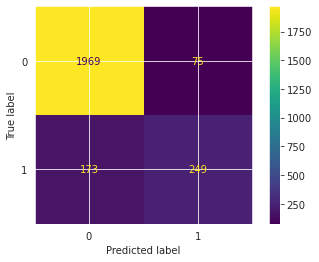

In [54]:

from sklearn.metrics import ConfusionMatrixDisplay

#Displaying the results as Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_base);

**Let's get the evaluation measures for the model:**

In [55]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

#printing the evaluation measures for test set
print("base_model=XGBClassifier\n\n", classification_report(y_test, y_pred_base, digits=3))
print("roc_auc    ", round(roc_auc_score(y_test, y_pred_base), 3))

base_model=XGBClassifier

               precision    recall  f1-score   support

           0      0.919     0.963     0.941      2044
           1      0.769     0.590     0.668       422

    accuracy                          0.899      2466
   macro avg      0.844     0.777     0.804      2466
weighted avg      0.893     0.899     0.894      2466

roc_auc     0.777


* **It should be noted that this was only a base model. We will train our models with another step added below.**

* **As shown in the EDA, our data set is extremely imbalanced. Hence, we will apply SMOTE on our train dataset before training each model. For this purpose, we add the SMOTE function to all our Machine Learning pieplines going forward.**

**NOTE: All the above steps will be repeated for each model.**

#XGB Classifier

In [19]:
#defining the classifier 
XGB=XGBClassifier(eval_metric='logloss', max_depth=17)

#steps in the pipeline 
steps=[('SMOTE', SMOTE(random_state=rng)),("classifier", XGB)]

#defining the pipeline
clf_XGB= Pipeline(steps=steps)

#results from training the model using cross_validation and the predefined pipeline 
scores_XGB = cross_validate(clf_XGB, X_train, y_train, cv=cv, scoring=scoring)

#printing the scores from the result of model training with cross validation
for k, v in scores_XGB.items():
    print(k, np.round(v.mean(),4))


fit_time 7.9441
score_time 0.0363
test_roc_auc 0.9238
test_accuracy 0.8844
test_precision 0.5935
test_recall 0.7399
test_f1 0.658


In [56]:
#Fit the model on the Training set (loading the model) before calling the model for prediction
XGB_fit=XGB.fit(X_train, y_train)


In [57]:
#predicting the independent variable "Revenue" using the fitted piepline! :)
y_pred_XGB = XGB_fit.predict(X_test)

In [58]:
# Confusion Matrix
cm_XGB=confusion_matrix(y_test, y_pred_XGB)
cm_XGB

array([[1969,   75],
       [ 173,  249]])

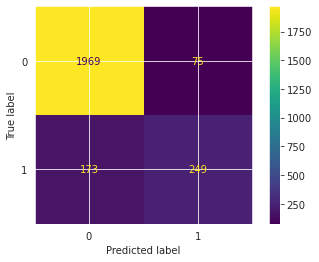

In [59]:
#Displaying the results of Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_XGB);

In [60]:
#getting the evaluation measures for test set
XGB_Metrics= classification_report(y_test, y_pred_XGB, digits=3)
XGB_ROC_AUC= round(roc_auc_score(y_test, y_pred_XGB),3)

#printing the evaluation measures for test set
print("XGBClassifier\n\n", XGB_Metrics)
print("roc_auc    ", XGB_ROC_AUC )

XGBClassifier

               precision    recall  f1-score   support

           0      0.919     0.963     0.941      2044
           1      0.769     0.590     0.668       422

    accuracy                          0.899      2466
   macro avg      0.844     0.777     0.804      2466
weighted avg      0.893     0.899     0.894      2466

roc_auc     0.777


In [61]:
#saving the model performance result in a dictionary for easy future access
XGB_report= classification_report(y_test, y_pred_XGB, digits=3, output_dict=True)


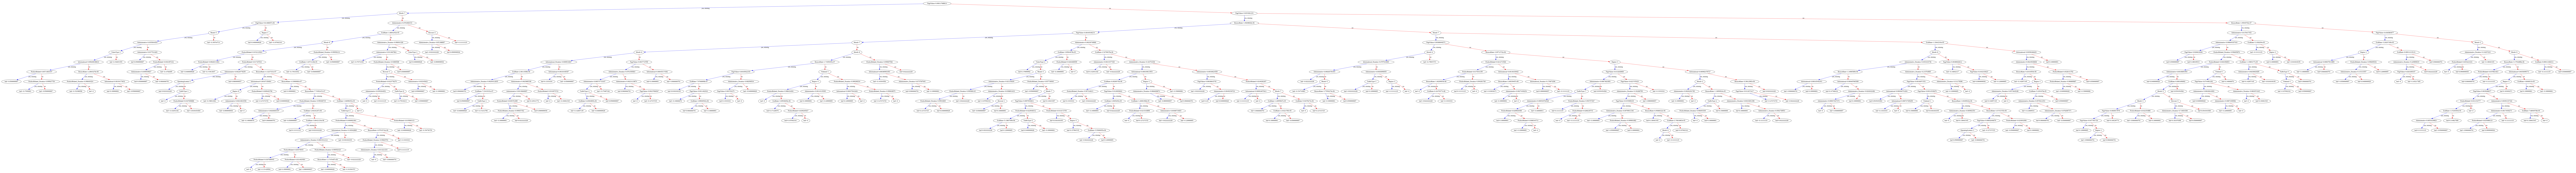

In [26]:
from xgboost import plot_tree
#Plotting the XGB tree
plot_tree(XGB);
fig = plt.gcf()
fig.set_size_inches(300, 300)
fig.savefig('XGBtree.png')

#Random Forest Classifier

In [27]:
from sklearn.ensemble import RandomForestClassifier

#defining the classifier 
RF=RandomForestClassifier(random_state=rng)

#steps in the pipeline 
steps=[('SMOTE', SMOTE(random_state=rng)),("classifier", RF)]

#defining the pipeline
clf_RF= Pipeline(steps=steps)

#results from training the model using cross_validation and the predefined pipeline 
scores_RF = cross_validate(clf_RF, X_train, y_train, cv=cv, scoring=scoring)

#printing the scores from the result of model training with cross validation
for k, v in scores_RF.items():
    print(k, np.round(v.mean(),4))

fit_time 2.9326
score_time 0.076
test_roc_auc 0.9189
test_accuracy 0.8796
test_precision 0.5747
test_recall 0.7716
test_f1 0.6582


In [62]:
#Fit the model on the Training set (loading the model) before calling the model for prediction
RF_fit=RF.fit(X_train, y_train)

In [63]:
#predicting the independent variable "Revenue" using the fitted piepline! :)
y_pred_RF = RF_fit.predict(X_test)

In [64]:
# Confusion Matrix
cm_RF=confusion_matrix(y_test, y_pred_RF)
cm_RF

array([[1965,   79],
       [ 191,  231]])

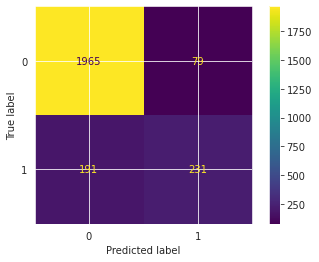

In [65]:
#Displaying the results of Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_RF);

In [66]:
#getting the evaluation measures for test set
RF_Metrics= classification_report(y_test, y_pred_RF, digits=3)
RF_ROC_AUC= round(roc_auc_score(y_test, y_pred_RF),3)

#printing the evaluation measures for test set
print("RandomForestClassifier\n\n", RF_Metrics)
print("roc_auc    ", RF_ROC_AUC )

RandomForestClassifier

               precision    recall  f1-score   support

           0      0.911     0.961     0.936      2044
           1      0.745     0.547     0.631       422

    accuracy                          0.891      2466
   macro avg      0.828     0.754     0.783      2466
weighted avg      0.883     0.891     0.884      2466

roc_auc     0.754


In [67]:
#saving the model performance result in a dictionary for easy future access
RF_report= classification_report(y_test, y_pred_RF, digits=3, output_dict=True)

#Desicion Tree Classifier

In [34]:
#defining the classifier 
DT=DecisionTreeClassifier(random_state=rng)

#steps in the pipeline 
steps=[('SMOTE', SMOTE(random_state=rng)),("classifier", DT)]

#defining the pipeline
clf_DT= Pipeline(steps=steps)

#results from training the model using cross_validation and the predefined pipeline 
scores_DT = cross_validate(clf_DT, X_train, y_train, cv=cv, scoring=scoring)

#printing the scores from the result of model training with cross validation
for k, v in scores_DT.items():
    print(k, np.round(v.mean(),4))

fit_time 0.2442
score_time 0.0092
test_roc_auc 0.7781
test_accuracy 0.8529
test_precision 0.5087
test_recall 0.671
test_f1 0.5778


In [68]:
#Fit the model on the Training set (loading the model) before calling the model for prediction
DT_fit= DT.fit(X_train, y_train)


In [69]:
#predicting the independent variable "Revenue" using the fitted piepline! :)
y_pred_DT = DT_fit.predict(X_test)

In [70]:
# Confusion Matrix
cm_DT=confusion_matrix(y_test, y_pred_DT)
cm_DT

array([[1869,  175],
       [ 181,  241]])

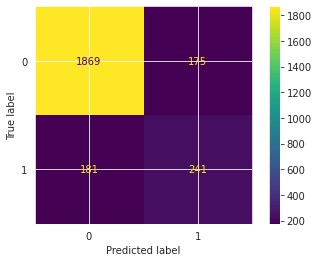

In [71]:
#Displaying the results of Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_DT);

In [72]:
#getting the evaluation measures for test set
DT_Metrics= classification_report(y_test, y_pred_DT, digits=3)
DT_ROC_AUC= round(roc_auc_score(y_test, y_pred_DT),3)

#printing the evaluation measures for test set
print("DecisionTreeClassifier\n\n", DT_Metrics)
print("roc_auc    ", DT_ROC_AUC )

DecisionTreeClassifier

               precision    recall  f1-score   support

           0      0.912     0.914     0.913      2044
           1      0.579     0.571     0.575       422

    accuracy                          0.856      2466
   macro avg      0.746     0.743     0.744      2466
weighted avg      0.855     0.856     0.855      2466

roc_auc     0.743


In [73]:
#saving the model performance result in a dictionary for easy future access
DT_report= classification_report(y_test, y_pred_DT, digits=3, output_dict=True)

#Support Vector Classification

In [75]:
from sklearn import svm

#defining the classifier 
SVC_L=svm.SVC(kernel='linear', random_state=rng)

#steps in the pipeline 
steps=[('SMOTE', SMOTE(random_state=rng)),("classifier", SVC_L)]

#defining the pipeline
clf_SVC_L= Pipeline(steps=steps)

#results from training the model using cross_validation and the predefined pipeline 
scores_SVC_L = cross_validate(clf_SVC_L, X_train, y_train, cv=cv, scoring=scoring)

#printing the scores from the result of model training with cross validation
for k, v in scores_SVC_L.items():
    print(k, np.round(v.mean(),4))

fit_time 16.6938
score_time 0.5174
test_roc_auc 0.8448
test_accuracy 0.8911
test_precision 0.7096
test_recall 0.4694
test_f1 0.5639


In [76]:
#Fit the model on the Training set (loading the model) before calling the model for prediction
SVC_fit=SVC_L.fit(X_train, y_train)


In [77]:
#predicting the independent variable "Revenue" using the fitted piepline! :)
y_pred_SVC_L = SVC_fit.predict(X_test)

In [78]:
# Confusion Matrix
cm_SVC_L=confusion_matrix(y_test, y_pred_SVC_L)
cm_SVC_L

array([[2029,   15],
       [ 353,   69]])

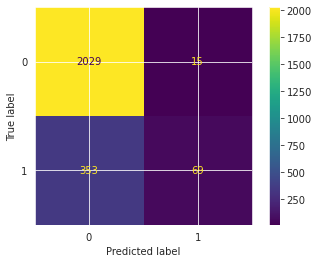

In [79]:
#Displaying the results of Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_SVC_L);

In [80]:
#getting the evaluation measures for test set
SVC_L_Metrics= classification_report(y_test, y_pred_SVC_L, digits=3)
SVC_L_ROC_AUC= round(roc_auc_score(y_test, y_pred_SVC_L),3)

#printing the evaluation measures for test set
print("Support Vector Classification \n\n", SVC_L_Metrics)
print("roc_auc    ", SVC_L_ROC_AUC )

Support Vector Classification 

               precision    recall  f1-score   support

           0      0.852     0.993     0.917      2044
           1      0.821     0.164     0.273       422

    accuracy                          0.851      2466
   macro avg      0.837     0.578     0.595      2466
weighted avg      0.847     0.851     0.807      2466

roc_auc     0.578


In [81]:
#saving the model performance result in a dictionary for easy future access
SVC_L_report= classification_report(y_test, y_pred_SVC_L, digits=3, output_dict=True)

#LogisticRegression

**For Logistic regression we would need to apply more preprocessing to data set.** 

In [93]:
#making a copy of dataset just for this model 
df_LR=df_original.copy()

In [94]:
#Defining dummy values for all categorical variables 
Month=pd.get_dummies(df_LR["Month"], drop_first=True)
Region=pd.get_dummies(df_LR["Region"], drop_first=True)
Browser=pd.get_dummies(df_LR["Browser"], drop_first=True)
OperatingSystems=pd.get_dummies(df_LR["OperatingSystems"], drop_first=True)
TrafficType=pd.get_dummies(df_LR["TrafficType"], drop_first=True)
VisitorType=pd.get_dummies(df_LR["VisitorType"], drop_first=True)
Weekend=pd.get_dummies(df_LR["Weekend"], drop_first=True)
Revenue=pd.get_dummies(df_LR["Revenue"], drop_first=True)

In [95]:
#dropping the original variables
df_LR.drop(["Month", "OperatingSystems", "Browser",
            "Region", "TrafficType", "VisitorType", "Weekend", "Revenue"], axis=1, inplace=True)

In [96]:
#adding the newly created dummy variables to the dataset while separating dependent and independent variables
X_LR=pd.concat([df_LR, Month, OperatingSystems, Browser,
            Region, TrafficType, VisitorType, Weekend],axis=1)
y_LR=Revenue

In [97]:
#standardizing the dataset values
scalar=StandardScaler()
X_LR=scalar.fit_transform(X_LR)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['bool', 'int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['bool', 'int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [98]:
from numpy.ma.core import ravel
#changing the 2D "Rveneue" array into a contiguous flattened array
y_LR=ravel(y_LR)

In [99]:

# Split dataset to train and test set
X_train_LR, X_test_LR, y_train_LR, y_test_LR = train_test_split(X_LR, y_LR, train_size=0.8, test_size=0.2, random_state=rng)

In [100]:
from sklearn.linear_model import LogisticRegression

#defining the classifier 
LR=LogisticRegression(random_state=rng)

#steps in the pipeline 
steps=[('SMOTE', SMOTE( random_state=rng)),("classifier", LR)]

#defining the pipeline
clf_LR= Pipeline(steps=steps)

#results from training the model using cross_validation and the predefined pipeline 
scores_LR = cross_validate(clf_LR, X_train_LR, y_train_LR, cv=cv, scoring=scoring)

#printing the scores from the result of model training with cross validation
for k, v in scores_LR.items():
    print(k, np.round(v.mean(),4))

fit_time 0.3989
score_time 0.0139
test_roc_auc 0.8999
test_accuracy 0.8549
test_precision 0.5267
test_recall 0.7523
test_f1 0.619


In [101]:
#Fit the model on the Training set (loading the model) before calling the model for prediction
LR_fit=LR.fit(X_train_LR, y_train_LR)

In [102]:
#predicting the independent variable "Revenue" using the fitted piepline! :)
y_pred_LR = LR_fit.predict(X_test_LR)

In [103]:
# Confusion Matrix
cm_LR=confusion_matrix(y_test_LR, y_pred_LR)
cm_LR

array([[2053,   54],
       [ 214,  145]])

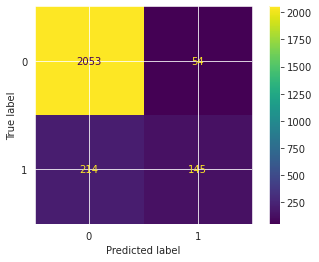

In [104]:
#Displaying the results of Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test_LR, y_pred_LR);

In [105]:
#getting the evaluation measures for test set
LR_Metrics= classification_report(y_test_LR, y_pred_LR, digits=3)
LR_ROC_AUC= round(roc_auc_score(y_test_LR, y_pred_LR),3)

#printing the evaluation measures for test set
print("Logistic Regression Classifier \n\n", LR_Metrics)
print("roc_auc    ", LR_ROC_AUC )

Logistic Regression Classifier 

               precision    recall  f1-score   support

           0      0.906     0.974     0.939      2107
           1      0.729     0.404     0.520       359

    accuracy                          0.891      2466
   macro avg      0.817     0.689     0.729      2466
weighted avg      0.880     0.891     0.878      2466

roc_auc     0.689


In [106]:
#saving the model performance result in a dictionary for easy future access
LR_report= classification_report(y_test_LR, y_pred_LR, digits=3, output_dict=True)

In [107]:
#saving the model performance result in a dictionary for easy future access
LR_report= classification_report(y_test, y_pred_LR, digits=3, output_dict=True)

#Comparing the Models 

In [108]:
from tabulate import tabulate

In [109]:
#create data
data = [["Extreme Gradiant Boosting", XGB_report["accuracy"], XGB_report["0"]["recall"], XGB_report["1"]["recall"], 
         XGB_report["0"]["precision"], XGB_report["1"]["precision"], XGB_report["0"]["f1-score"], XGB_report["1"]["f1-score"], XGB_ROC_AUC],
        
        ["Random Forest", RF_report["accuracy"], RF_report["0"]["recall"], RF_report["1"]["recall"], 
         RF_report["0"]["precision"], RF_report["1"]["precision"], RF_report["0"]["f1-score"], RF_report["1"]["f1-score"], RF_ROC_AUC], 
        
        ["Decision Tree", DT_report["accuracy"], DT_report["0"]["recall"], DT_report["1"]["recall"], 
         DT_report["0"]["precision"], DT_report["1"]["precision"], DT_report["0"]["f1-score"], DT_report["1"]["f1-score"], DT_ROC_AUC], 
        
        ["Support Vector Classifier", SVC_L_report["accuracy"], SVC_L_report["0"]["recall"], SVC_L_report["1"]["recall"], 
         SVC_L_report['0']["precision"], SVC_L_report["1"]["precision"], SVC_L_report["0"]["f1-score"], SVC_L_report["1"]["f1-score"], SVC_L_ROC_AUC],
        
        ["Logistic Regression", LR_report["accuracy"], LR_report["0"]["recall"], LR_report["1"]["recall"], 
         LR_report["0"]["precision"], LR_report["1"]["precision"], LR_report["0"]["f1-score"], LR_report["1"]["f1-score"], LR_ROC_AUC]]
  
#define header names
col_names = ["Classifier", "Accuracy", "Recall (Revenue=False)", "Recall (Revenue=True)", "Precision (Revenue=False)",
             "Precision (Revenue=True)", "F1 (Revenue=False)", "F1 (Revenue=True)", "ROC_AUC"]
  
#display table
print(tabulate(data, headers=col_names, tablefmt="fancy_grid"))


╒═══════════════════════════╤════════════╤══════════════════════════╤═════════════════════════╤═════════════════════════════╤════════════════════════════╤══════════════════════╤═════════════════════╤═══════════╕
│ Classifier                │   Accuracy │   Recall (Revenue=False) │   Recall (Revenue=True) │   Precision (Revenue=False) │   Precision (Revenue=True) │   F1 (Revenue=False) │   F1 (Revenue=True) │   ROC_AUC │
╞═══════════════════════════╪════════════╪══════════════════════════╪═════════════════════════╪═════════════════════════════╪════════════════════════════╪══════════════════════╪═════════════════════╪═══════════╡
│ Extreme Gradiant Boosting │   0.899432 │                 0.963307 │                0.590047 │                    0.919234 │                   0.768519 │             0.940755 │           0.66756   │     0.777 │
├───────────────────────────┼────────────┼──────────────────────────┼─────────────────────────┼─────────────────────────────┼───────────────────────────

* **Overall the XGB classifier seems to be performing better than all others.**
* **Definitely the selection of the model will also depend on the marketing strateg. after selecting the high f1-score and high accuracy we may have two options:**
* If we are going to only offer incentives to customers that have lower intention of purchase, then the *Recall* for class 0 becomes more important which means we need to minimize the False Negative (customers that had lower intention but were wringly missed by model due to being classified as high intention purchae)
* on the other hand if we are planning to offer incentives to customers that have higher intention of purchase, so they don't leave the website without finilizing their purchase, then the recall for class 1 is more important.

* **based on what we have accomlpolished so far, XGB and Random Forest are better choices. But we can't make the final decision yet.** 

* **Next we will look into feature of importance, changing the SMOTE criteria,  and other techinics to improve our prediction models.** 